In [1]:
#.libPaths(c("/home/data/t060324/R/x86_64-pc-linux-gnu-library/4.1","/home/data/refdir/Rlib"))
library(scibet)
library(Seurat)
library(scater)
library(scran)
library(dplyr)
library(Matrix)
library(cowplot)
#library(CARD)
library(ggplot2)
rm(list=ls())
library(harmony)
setwd('/home/data/t060324/jobs/aimin/')

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians

In [2]:
ST_obj <- readRDS(file = paste0('./data/GSE211956_RAW/GSM6506114_ST.RDS'))

In [3]:
head(ST_obj)

orig.ident nCount_Spatial nFeature_Spatial nCount_SCT
AAACAAGTATCTCCCA-1 OV          1458           897             4550      
AAACAGAGCGACTCCT-1 OV         13579          4193             6719      
AAACAGTGTTCCTGGG-1 OV          5048          2347             5288      
AAACCGTTCGTCCAGG-1 OV          4961          1974             5336      
AAACGAGACGGTTGAT-1 OV         25461          5193             5711      
AAACGGTTGCGAACTG-1 OV          2199          1169             5078      
AAACTCGGTTCGCAAT-1 OV          2624          1482             5126      
AAACTGCTGGCTCCAA-1 OV          6965          2639             6200      
AAAGGCTACGGACCAT-1 OV          2914          1513             5027      
AAAGGCTCTCGCGCCG-1 OV          3510          1533             5036      
                   nFeature_SCT SCT_snn_res.1 seurat_clusters B           
AAACAAGTATCTCCCA-1 1220         2             2               3.583529e-05
AAACAGAGCGACTCCT-1 3299         5             5               1.948892e-02
AAACAGTGTTCCTGGG-1 2340         8             8               2.740449e-02
AAACCGTTCGTCCAGG-1 1972         1             1               7.782802e-09
AAACGAGACGGTTGAT-1 2130         4             4               1.158330e-08
AAACGGTTGCGAACTG-1 1274         2             2               4.296743e-07
AAACTCGGTTCGCAAT-1 1558         8             8               6.035303e-04
AAACTGCTGGCTCCAA-1 2637         2             2               2.244414e-07
AAAGGCTACGGACCAT-1 1548         0             0               2.029702e-06
AAAGGCTCTCGCGCCG-1 1540         1             1               1.175177e-07
                   plasma       T            myeloid   NK          
AAACAAGTATCTCCCA-1 4.712027e-06 3.602856e-05 0.9096071 9.713918e-05
AAACAGAGCGACTCCT-1 4.456668e-02 1.131968e-02 0.6876199 1.674574e-02
AAACAGTGTTCCTGGG-1 8.296311e-02 2.923773e-02 0.1735847 3.894371e-02
AAACCGTTCGTCCAGG-1 2.502668e-08 1.869079e-08 0.9999834 5.237218e-09
AAACGAGACGGTTGAT-1 6.366099e-08 2.920109e-08 0.9999789 4.843372e-08
AAACGGTTGCGAACTG-1 1.940041e-06 2.286497e-07 0.9999759 1.540704e-07
AAACTCGGTTCGCAAT-1 7.752362e-03 9.624542e-04 0.9265027 9.534002e-04
AAACTGCTGGCTCCAA-1 6.749369e-07 1.785720e-07 0.9999729 8.677836e-08
AAAGGCTACGGACCAT-1 1.340136e-06 1.358504e-06 0.9991901 1.911064e-06
AAAGGCTCTCGCGCCG-1 3.053705e-07 1.954170e-07 0.9998581 7.414339e-08
                   fibo         endo         Epi         
AAACAAGTATCTCCCA-1 2.924081e-02 2.053791e-03 5.892457e-02
AAACAGAGCGACTCCT-1 6.448490e-02 9.834170e-03 1.459400e-01
AAACAGTGTTCCTGGG-1 4.505919e-01 1.313135e-01 6.596080e-02
AAACCGTTCGTCCAGG-1 2.260791e-06 3.777566e-07 1.388344e-05
AAACGAGACGGTTGAT-1 8.355268e-06 1.245572e-06 1.130128e-05
AAACGGTTGCGAACTG-1 1.281209e-05 9.202870e-07 7.576937e-06
AAACTCGGTTCGCAAT-1 2.372130e-02 1.030839e-02 2.919591e-02
AAACTGCTGGCTCCAA-1 3.559652e-06 4.828499e-07 2.190852e-05
AAAGGCTACGGACCAT-1 5.438632e-05 7.422421e-06 7.414314e-04
AAAGGCTCTCGCGCCG-1 1.118356e-05 3.254276e-06 1.267942e-04

In [4]:
ST_obj <- FindClusters(ST_obj,resolution = 0.5, verbose = FALSE) 

In [5]:
length(unique(ST_obj$seurat_clusters))

[1] 10

In [7]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 10)

In [8]:
cellType_col

[1] "#B15928" "#E31A1C" "#1B9E77" "#386CB0" "#B3E2CD" "#666666" "#FFFF99"
 [8] "#E6AB02" "#FC8D62" "#B3B3B3"

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


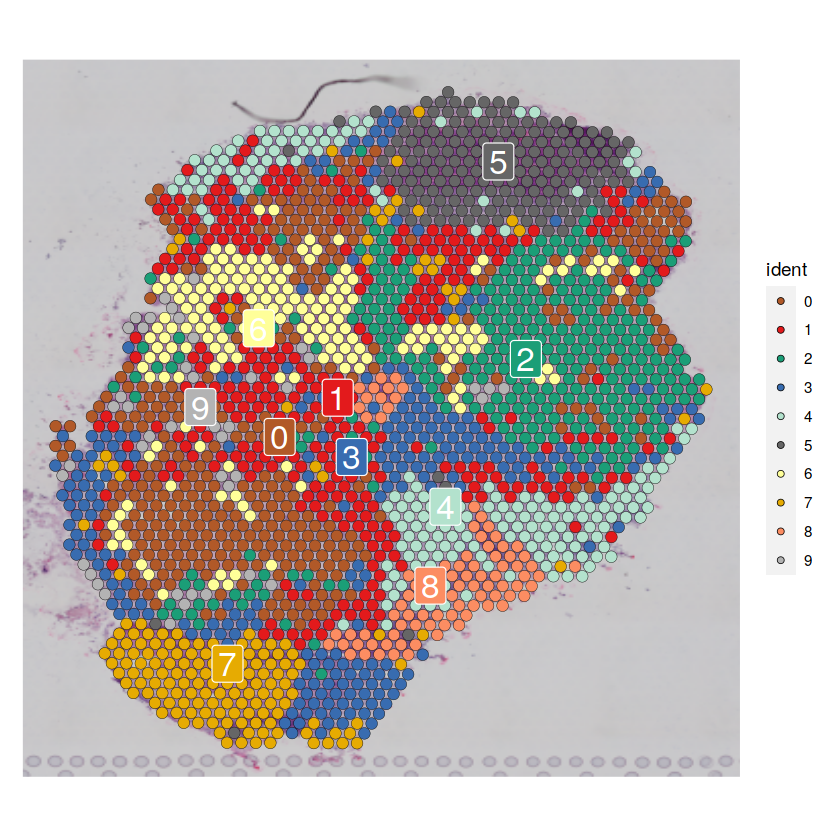

In [9]:
Idents(ST_obj) <- 'seurat_clusters'
SpatialDimPlot(ST_obj,label = TRUE)+scale_fill_manual(values = cellType_col)

In [11]:
MarkerGene <- FindAllMarkers(ST_obj,only.pos = T,logfc.threshold = 0.5)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [12]:
TAM_SPP1 <- c(6)
TAM_C1QA <- c(1)
TAM_TIMP1 <- c(2)
TAM <- c(0,3)
Immune_Fibroblasts_mix <- c(4)
Immune_tumor_mix <- c(5)
Epithelial <- c(9)
Tumor_Fibroblasts_mix <- c(8)
Myofibro <- c(7)


current.cluster.ids <- c(TAM_SPP1,TAM_C1QA,TAM_TIMP1,TAM,
                         Immune_Fibroblasts_mix,Immune_tumor_mix,
                         Epithelial,Tumor_Fibroblasts_mix,Myofibro
                         )

new.cluster.ids <- c(
                     rep("TAM SPP1",length(TAM_SPP1)),
                     rep("TAM C1QA",length(TAM_C1QA)),
                     rep("TAM TIMP1",length(TAM_TIMP1)),
                     rep("TAM",length(TAM)),
                     rep("Immune_Fibroblasts_mix",length(Immune_Fibroblasts_mix)),
                     rep("Immune_tumor_mix",length(Immune_tumor_mix)),
                     rep("Epithelial",length(Epithelial)), 
                    rep("Tumor_Fibroblasts_mix",length(Tumor_Fibroblasts_mix)),
                     rep("Myofibro",length(Myofibro))
)
ST_obj@meta.data$cellType <- plyr::mapvalues(x = ST_obj@meta.data$seurat_clusters, from = current.cluster.ids, to = new.cluster.ids)


In [13]:
ST_obj$cellType <- as.character(ST_obj$cellType)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


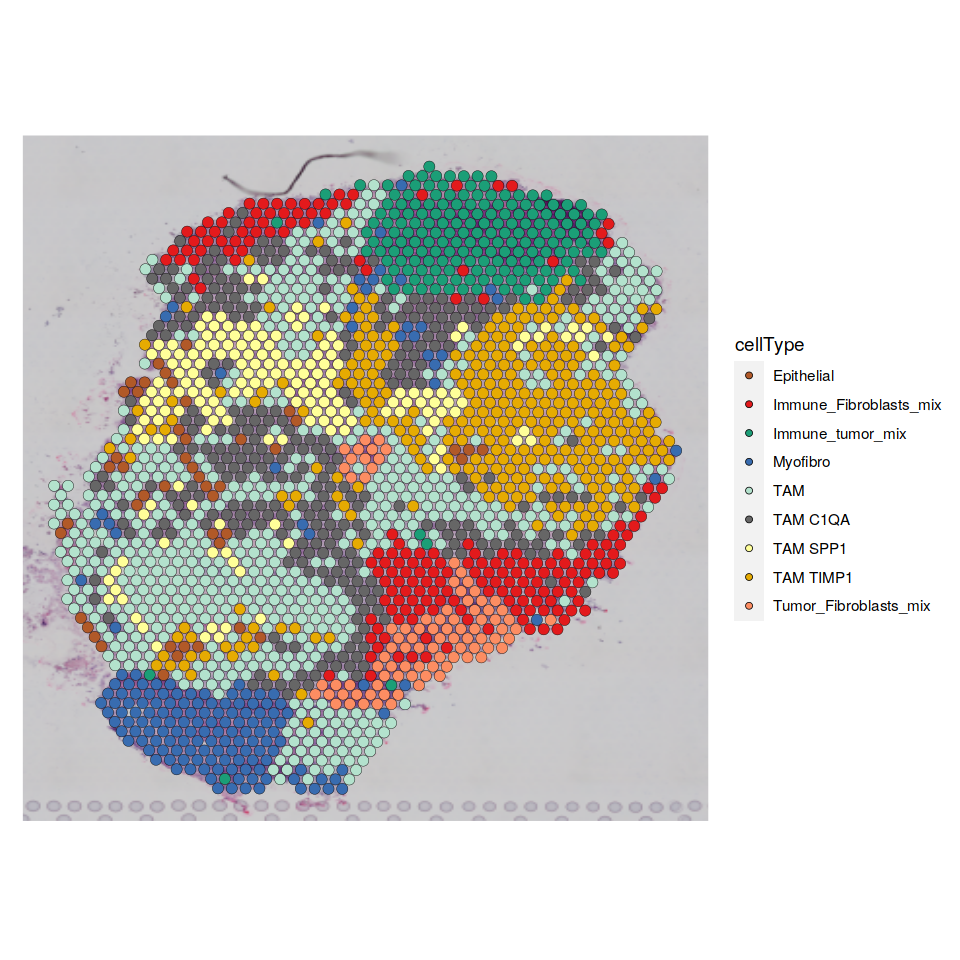

In [14]:
library(RColorBrewer)
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
#处理后有73种差异还比较明显的颜色，基本够用
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
set.seed(seed = 1234)
cellType_col <- sample(col_vector, 9)
p1 <- SpatialDimPlot(ST_obj,group.by = 'cellType',label = F,label.size = 0.5)+scale_fill_manual(values = cellType_col)
p1

In [14]:
B_gene <- c('MS4A1','CD79A','CD83')
Plasma_gene <- c('DERL3','MZB1','JCHAIN')
T_gene <-c('CD3D','CD3E','CD8A')
Epithelial_gene <-c('KRT19','KRT18','EPCAM')
myeloid_gene <-c('AIF1','CD14','C1QA','SPP1')
Endothelial_gene <-c('RAMP2','VWF','SELE')
Fibroblasts_gene <- c('MYH11','ACTA2','DCN')
cellMarker <- c(T_gene,Plasma_gene,B_gene,myeloid_gene,Fibroblasts_gene,Epithelial_gene)

In [15]:
source('./code/function/0.functions.R')

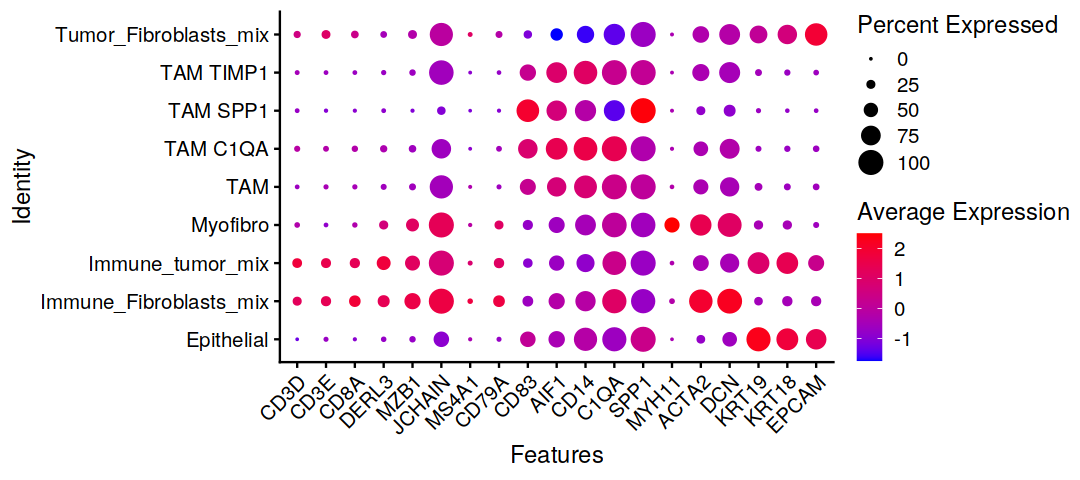

In [16]:
options(repr.plot.height = 4, repr.plot.width = 9)
dotp <- DotPlot(ST_obj,group.by = 'cellType',cols = c('blue','red'), features = unique(cellMarker),cluster.idents = F) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
dotp

In [17]:
pdf(file = './output/bulk/section_4/3.ST_P5_dotplot.pdf',width = 9,height = 4)
print(dotp)
dev.off()

png 
  2

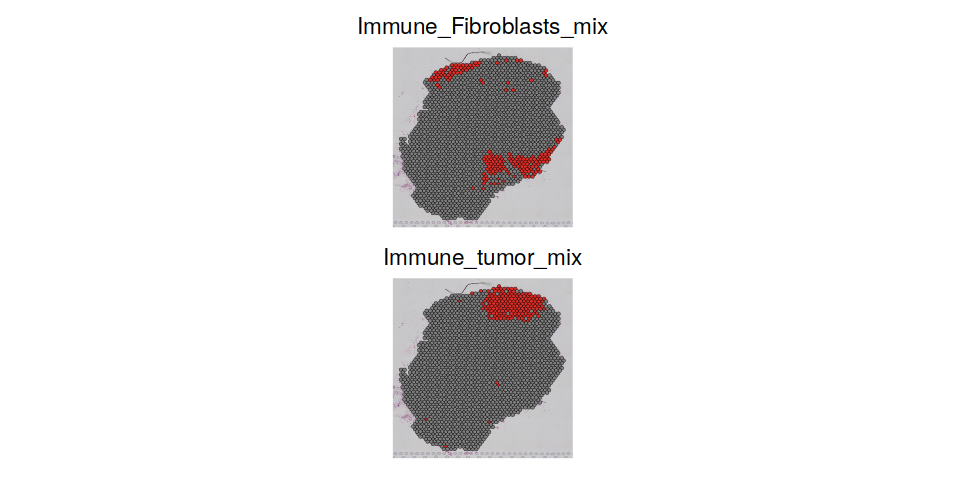

In [18]:
Idents(ST_obj) <- 'cellType'
options(repr.plot.height = 4, repr.plot.width = 8)
p2 <- SpatialDimPlot(ST_obj, cells.highlight = CellsByIdentities(object = ST_obj, idents = c('Immune_Fibroblasts_mix','Immune_tumor_mix')), facet.highlight = TRUE, ncol = 1)
p2

In [6]:
colnames(ST_obj@meta.data)[8:15] <- c('B_CARD','Plasma_CARD','T_CARD','Myeloid_CARD','NK_CARD','Fibroblasts_CARD','Endothelial_CARD','Tumour_CARD')

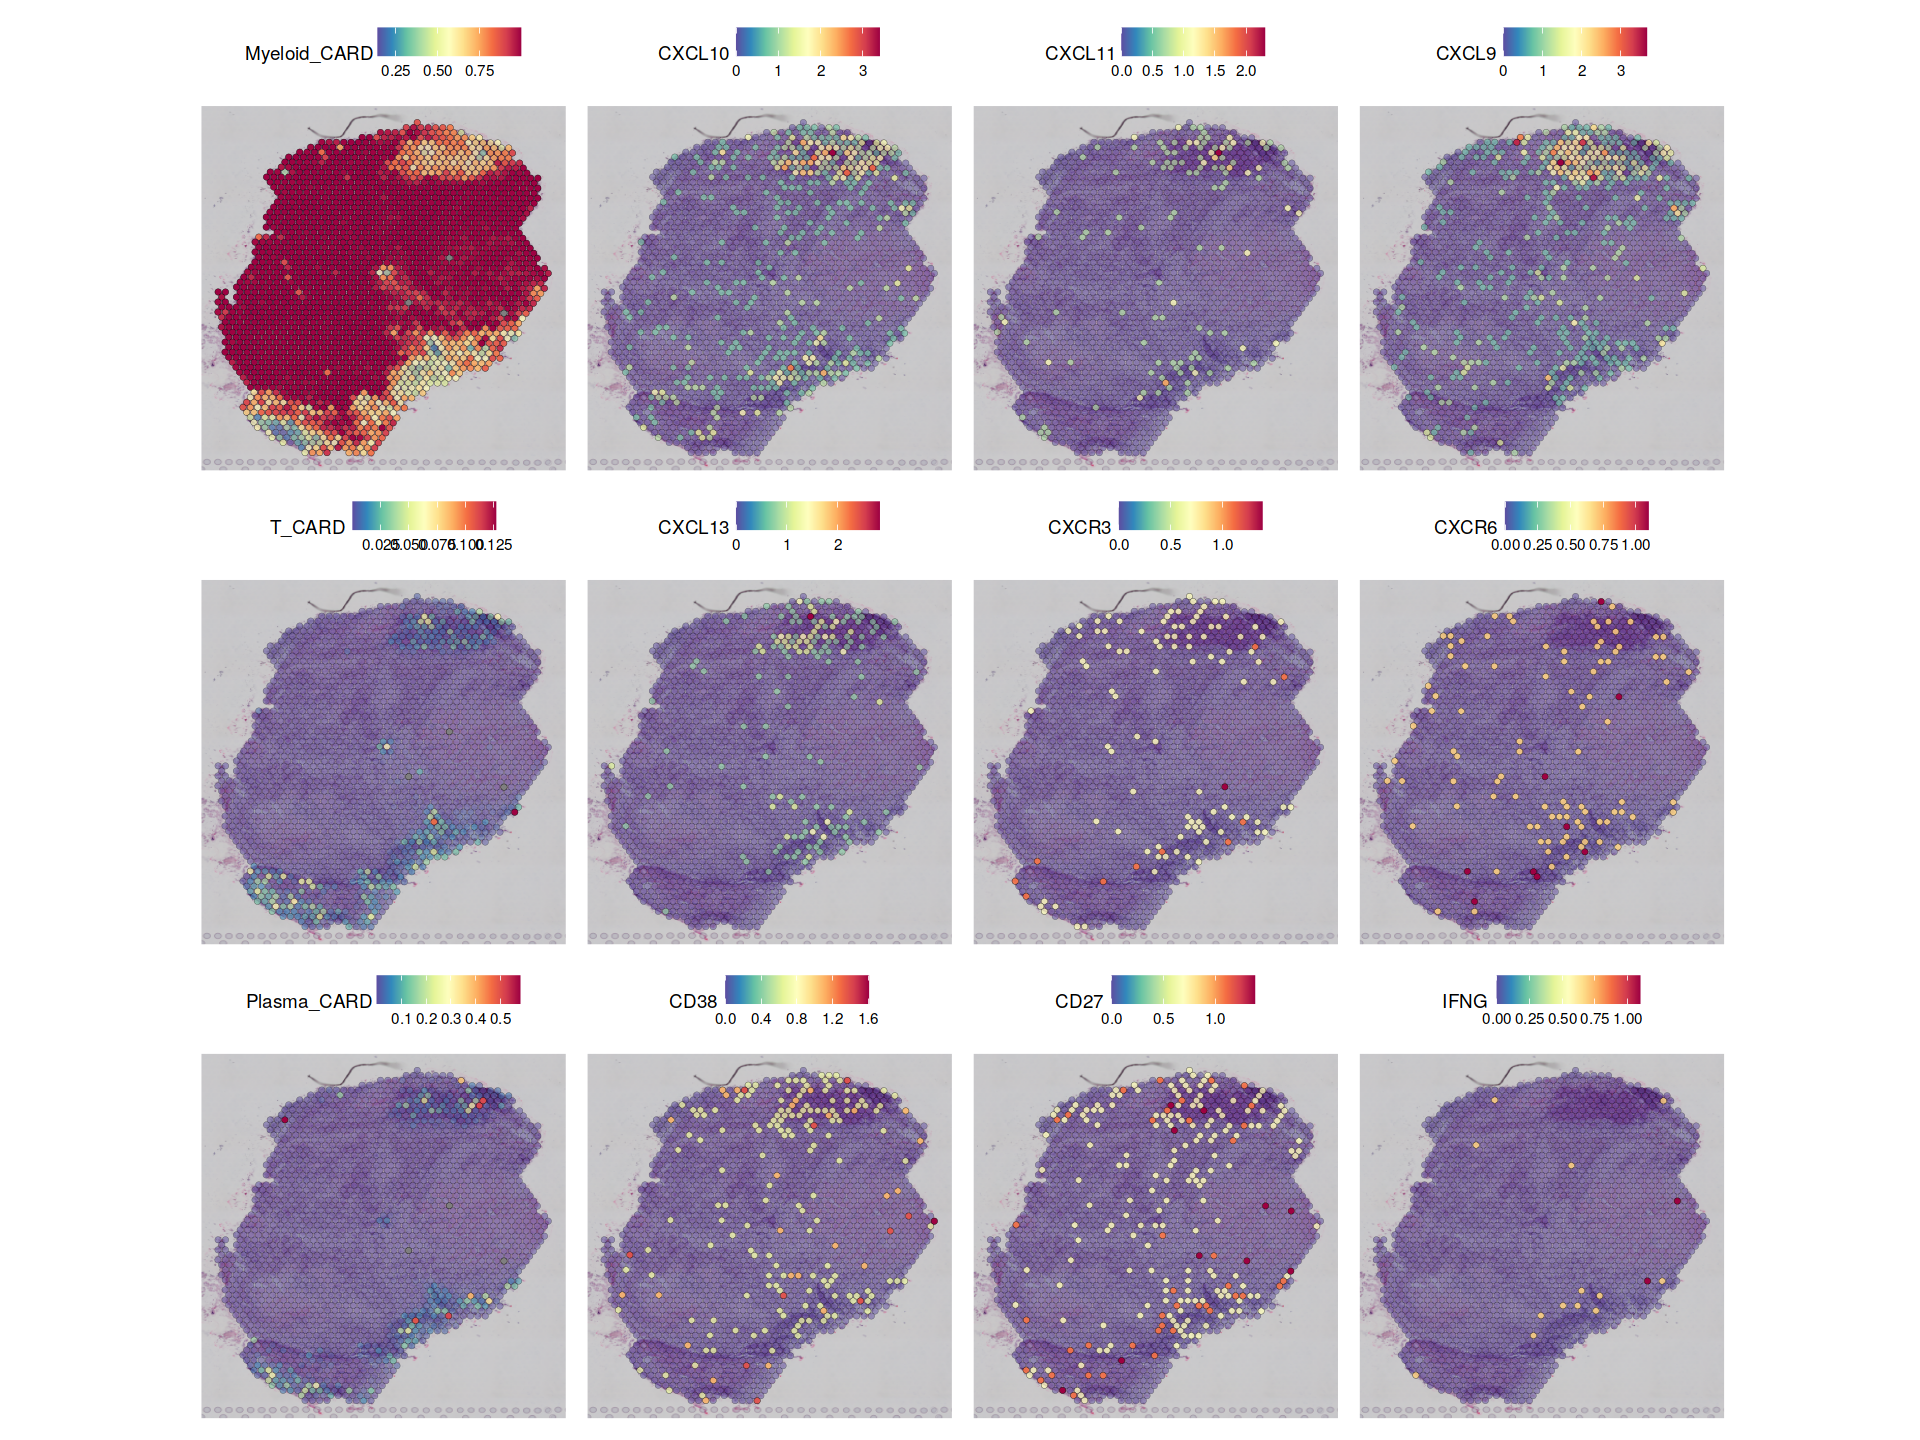

In [7]:
options(repr.plot.height = 12, repr.plot.width = 16)
p3 <- SpatialFeaturePlot(ST_obj, features = c('Myeloid_CARD','CXCL10','CXCL11','CXCL9','T_CARD','CXCL13','CXCR3','CXCR6','Plasma_CARD','CD38','CD27','IFNG'),alpha =  c(0.5, 1),ncol = 4,combine = T)
p3 

In [9]:
pdf(file = './output/bulk/section_4/3.ST_P5_immune_cell_selectgene2_plot.pdf',width = 12,height = 16)
print(p3)
dev.off()

png 
  2

In [16]:
ST_obj$CXCL10 <- ifelse(c(ST_obj@assays$SCT@counts['CXCL10',]+ST_obj@assays$SCT@counts['CXCL11',]+ST_obj@assays$SCT@counts['CXCL9',])>1,'CXCL10+','CXCL10-')
ST_obj$CellType2 <- ifelse(ST_obj$cellType=='Immune_tumor_mix','Immune_tumor_mix','Other')
ST_obj$CXCR3 <- ifelse(c(ST_obj@assays$SCT@counts['CXCR3',])>1,'CXCR3+','CXCR3-')
ST_obj$CellType2 <- ifelse(ST_obj$cellType=='Immune_tumor_mix','Immune_tumor_mix','Other')

In [17]:
head(ST_obj@meta.data)

orig.ident nCount_Spatial nFeature_Spatial nCount_SCT
AAACAAGTATCTCCCA-1 OV          1458           897             4550      
AAACAGAGCGACTCCT-1 OV         13579          4193             6719      
AAACAGTGTTCCTGGG-1 OV          5048          2347             5288      
AAACCGTTCGTCCAGG-1 OV          4961          1974             5336      
AAACGAGACGGTTGAT-1 OV         25461          5193             5711      
AAACGGTTGCGAACTG-1 OV          2199          1169             5078      
                   nFeature_SCT SCT_snn_res.1 seurat_clusters B           
AAACAAGTATCTCCCA-1 1220         2             1               3.583529e-05
AAACAGAGCGACTCCT-1 3299         5             5               1.948892e-02
AAACAGTGTTCCTGGG-1 2340         8             7               2.740449e-02
AAACCGTTCGTCCAGG-1 1972         1             0               7.782802e-09
AAACGAGACGGTTGAT-1 2130         4             6               1.158330e-08
AAACGGTTGCGAACTG-1 1274         2             1               4.296743e-07
                   plasma       T            myeloid   NK          
AAACAAGTATCTCCCA-1 4.712027e-06 3.602856e-05 0.9096071 9.713918e-05
AAACAGAGCGACTCCT-1 4.456668e-02 1.131968e-02 0.6876199 1.674574e-02
AAACAGTGTTCCTGGG-1 8.296311e-02 2.923773e-02 0.1735847 3.894371e-02
AAACCGTTCGTCCAGG-1 2.502668e-08 1.869079e-08 0.9999834 5.237218e-09
AAACGAGACGGTTGAT-1 6.366099e-08 2.920109e-08 0.9999789 4.843372e-08
AAACGGTTGCGAACTG-1 1.940041e-06 2.286497e-07 0.9999759 1.540704e-07
                   fibo         endo         Epi          CXCL10 
AAACAAGTATCTCCCA-1 2.924081e-02 2.053791e-03 5.892457e-02 CXCL10-
AAACAGAGCGACTCCT-1 6.448490e-02 9.834170e-03 1.459400e-01 CXCL10+
AAACAGTGTTCCTGGG-1 4.505919e-01 1.313135e-01 6.596080e-02 CXCL10-
AAACCGTTCGTCCAGG-1 2.260791e-06 3.777566e-07 1.388344e-05 CXCL10-
AAACGAGACGGTTGAT-1 8.355268e-06 1.245572e-06 1.130128e-05 CXCL10-
AAACGGTTGCGAACTG-1 1.281209e-05 9.202870e-07 7.576937e-06 CXCL10-
                   SCT_snn_res.0.5 cellType         CellType2        CXCR3 
AAACAAGTATCTCCCA-1 1               TAM C1QA         Other            CXCR3-
AAACAGAGCGACTCCT-1 5               Immune_tumor_mix Immune_tumor_mix CXCR3-
AAACAGTGTTCCTGGG-1 7               Myofibro         Other            CXCR3-
AAACCGTTCGTCCAGG-1 0               TAM              Other            CXCR3-
AAACGAGACGGTTGAT-1 6               TAM SPP1         Other            CXCR3-
AAACGGTTGCGAACTG-1 1               TAM C1QA         Other            CXCR3-

In [18]:
table(ST_obj@meta.data[,c('cellType','CXCL10')])

                        CXCL10
cellType                 CXCL10- CXCL10+
  Epithelial                  46       1
  Immune_Fibroblasts_mix     151      37
  Immune_tumor_mix            40     144
  Myofibro                   139      27
  TAM                        564      54
  TAM C1QA                   305      22
  TAM SPP1                   174       4
  TAM TIMP1                  296      29
  Tumor_Fibroblasts_mix       50      41

In [19]:
library(ggsci)

$plot

$p.value
[1] 9.9999e-06


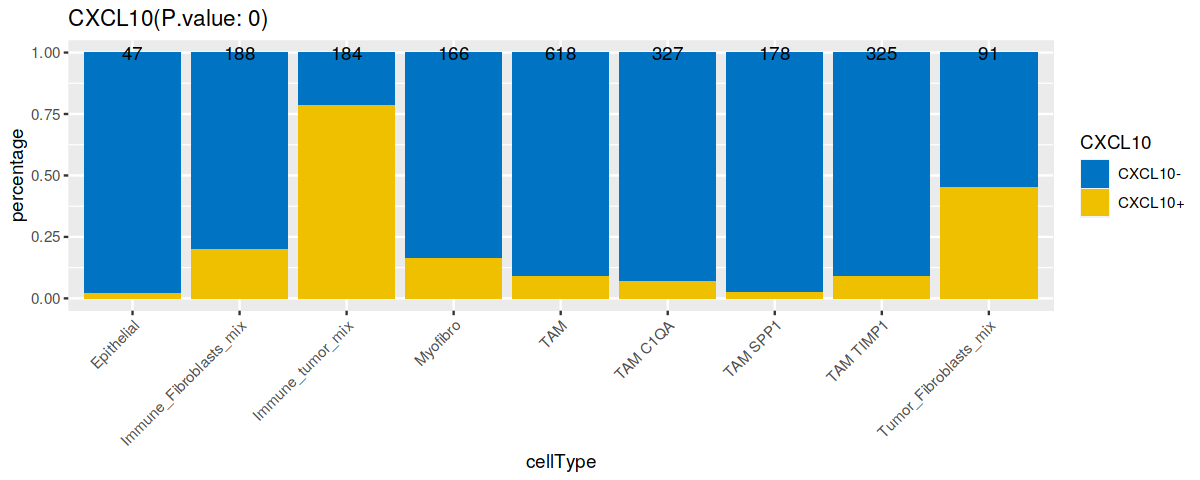

In [25]:
options(repr.plot.height = 4, repr.plot.width = 10)
p4 <- data_explor.discrete2discrete(data = as.data.frame(ST_obj@meta.data),core_dimension = 'cellType',inter_dimension = 'CXCL10',plot = T,position = 'fill')
p4$plot <- p4$plot+ scale_fill_jco()+ theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
p4

In [26]:
pdf(file = './output/bulk/section_4/3.ST_P5_CXCL10toCellType_barplot.pdf',width = 10,height = 4)
print(p4$plot)
dev.off()

png 
  2

In [48]:
ST_obj$CXCL10 <- ST_obj@assays$SCT@scale.data['CXCL10',]

In [50]:
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


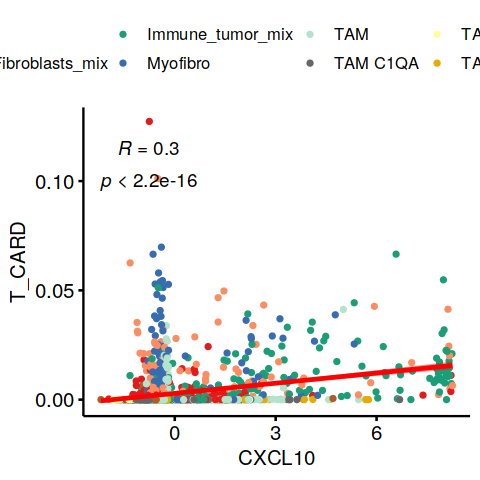

In [51]:
options(repr.plot.height = 4, repr.plot.width = 4)
p5 <- ggscatter(ST_obj@meta.data,x = 'CXCL10',y = 'T_CARD',color = 'cellType',size = 1, add = "reg.line", conf.int = TRUE,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='black'),cor.coef = TRUE)+scale_color_manual(values = cellType_col)
p5

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


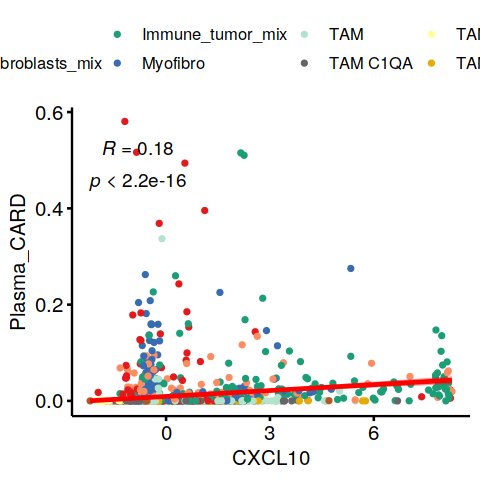

In [52]:
options(repr.plot.height = 4, repr.plot.width = 4)
p6 <- ggscatter(ST_obj@meta.data,x = 'CXCL10',y = 'Plasma_CARD',color = 'cellType',size = 1, add = "reg.line", conf.int = TRUE,add.params = list(color = "red"),cor.coeff.args = list(method = "pearson", label.sep = "\n",color='black'),cor.coef = TRUE)+scale_color_manual(values = cellType_col)
p6

In [53]:
pdf(file = './output/bulk/section_4/3.ST_P5_plot.pdf',width = 4,height = 4)
print(p1)
print(p2)
print(p5)
print(p6)
dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


png 
  2

In [54]:
pdf(file = './output/bulk/section_4/3.ST_P5_immune_cell_selectgene_plot.pdf',width = 12,height = 16)
print(p3)
dev.off()

png 
  2